In [362]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import random
import json

In [363]:
data = h5py.File('mnist_network_params.hdf5', 'r')

datafile = "mnist_testdata.hdf5"
with h5py.File(datafile, "r") as df:
    x = df["xdata"][:]
    y = df["ydata"][:]
    y = (y.argmax(axis=1)).astype(int)

w1 = np.asarray(data['W1'])
w2 = np.asarray(data['W2'])
w3 = np.asarray(data['W3'])
b1 = np.asarray(data['b1'])
b2 = np.asarray(data['b2'])
b3 = np.asarray(data['b3'])

print("Weight 1:", w1.shape)
print("Weight 2:", w2.shape)
print("Weight 3:", w3.shape)
print("Bias 1:", b1.shape)
print("Bias 2:", b2.shape)
print("Bias 3:", b3.shape)

Weight 1: (200, 784)
Weight 2: (100, 200)
Weight 3: (10, 100)
Bias 1: (200,)
Bias 2: (100,)
Bias 3: (10,)


In [364]:
def relu(x):
    return (np.maximum(x, 0))


def softmax(L3):
    ex = np.exp(L3)
    e = np.sum(ex, axis=1).reshape(-1, 1)
    softmax = ex/e
    return softmax


def Layer():
    L1 = np.zeros((10000, 200))
    L1 = np.matmul(x, w1.T) + b1
    relu1 = relu(L1)

    L2 = np.zeros((10000, 100))
    L2 = np.matmul(relu1, w2.T) + b2
    relu2 = relu(L2)

    L3 = np.zeros((10000, 100))
    L3 = np.matmul(relu2, w3.T) + b3
    return L3

In [365]:
l3 = Layer()
softmax = softmax(l3)

In [366]:
preds = []
for i in range(10000):
    data = {
        "activations": softmax[i].tolist(),
        "index": i,
        "classification": int(softmax[i].argmax()),
    }
    preds.append(data)

with open("result.json", "w") as f:
    f.write(json.dumps(preds))

In [367]:
y_pred = np.argmax(softmax, axis=1)
diff = []
count = np.sum(y == y_pred)
print("Number of correctly classified images -", count)
print("Number of incorrectly classified images -", 10000-count)
diff_pred = []
diff = [i for i in range(len(y)) if y[i] != y_pred[i]]
diff_pred = [i for i in range(len(y)) if y[i] == y_pred[i]]

Number of correctly classified images - 9790
Number of incorrectly classified images - 210


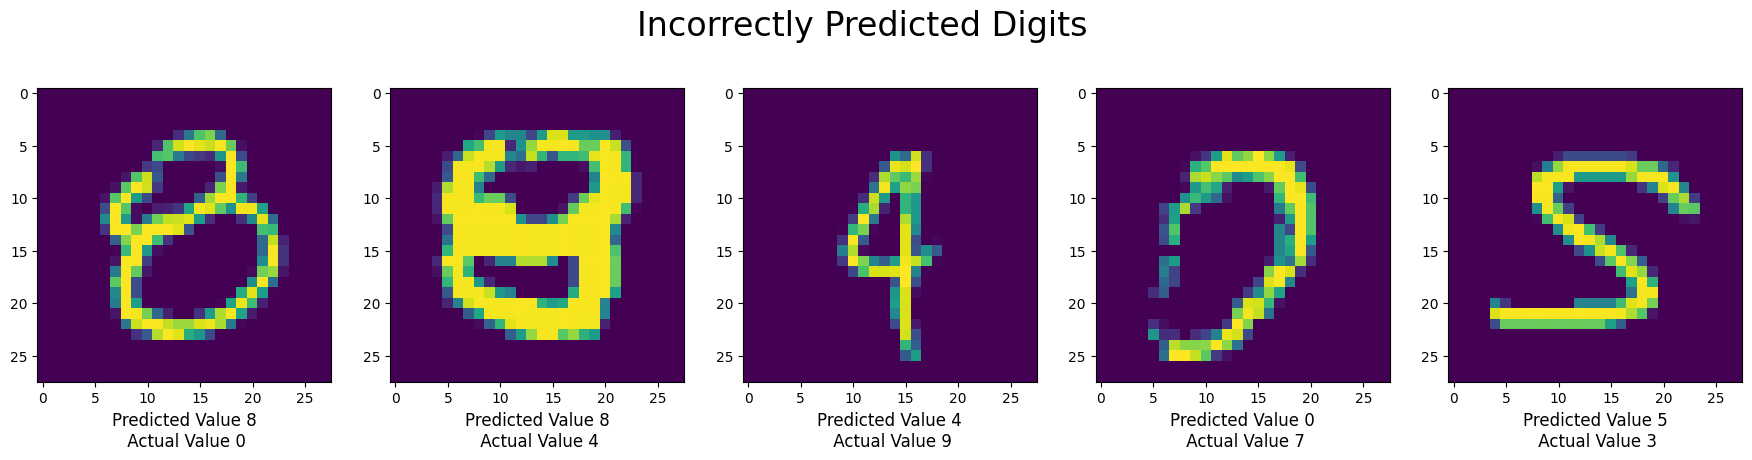

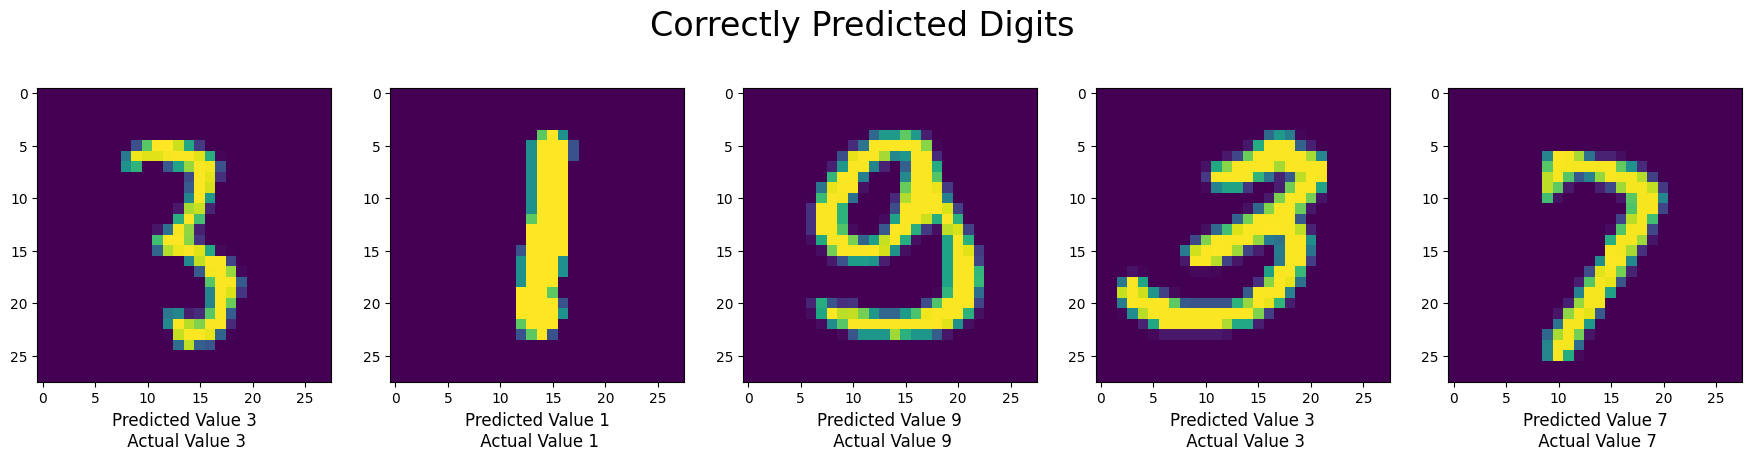

In [368]:
random.seed(51)
diff_random = random.choices(diff, k=5)
plt.figure(figsize=[22, 22])
i = 0
for j in diff_random:
    plt.subplot(1, len(diff_random), i+1)
    plt.imshow(x[j].reshape(28, 28))
    plt.xlabel('Predicted Value {}\n Actual Value {}'.format(y[j], y_pred[j]), fontsize=12)
    i += 1
plt.suptitle('Incorrectly Predicted Digits', y=0.59, va='center', fontsize=24)
plt.show()

plt.figure(figsize=[22, 22])
random.seed(49)
diff_rand = random.choices(diff_pred, k=5)
i = 0
for j in diff_rand:
    plt.subplot(1, len(diff_random), i+1)
    plt.imshow(x[j].reshape(28, 28))
    plt.xlabel('Predicted Value {}\n Actual Value {}'.format(y[j], y_pred[j]), fontsize=12)
    i += 1
plt.suptitle('Correctly Predicted Digits', y=0.59, va='center', fontsize=24)
plt.show()